In [1]:
from Wavelet_Fast import *

import numpy as np
import matplotlib
from scipy import  fft
from astropy.io import fits

Data batch scale analysis of NGC 1569:

In [2]:
names=['NGC1569_FUVcut','NGC1569_U','NGC1569_B','NGC1569_V','NGC1569_Hmrms','NGC1569_HIM0']
paths=['n1569fcut.fit','n1569u.fit','n1569b.fit','n1569v.fit','n1569hmrms.fits','n1569moment0.fits']
scales=[[2,60,0.67],[2,60,1],[2,60,1],[2,60,1],[2,60,2],[2,60,0.67]]
scale_types=["triplet","triplet","triplet","triplet","triplet","triplet"]
pixel_scales=[1.5,1.134,1.134,1.134,0.487,1.5]
color=[]
distance=3360000
crop = [[[300,500],[300,500]],[[600,1400],[600,1400]],[[600,1400],[600,1400]],[[600,1400],[600,1400]],[[150,698],[0,548]],[[200,800],[200,800]]]

Commencing the wavelet scale analysis of NGC1569_FUVcut
|████████████████████████████████████████| 60/60 [100%] in 11.5s (5.24/s) 
Wavelet scale analysis of NGC1569_FUVcut has finished.
Commencing the wavelet scale analysis of NGC1569_U
|████████████████████████████████████████| 60/60 [100%] in 2:29.3 (0.40/s) 
Wavelet scale analysis of NGC1569_U has finished.
Commencing the wavelet scale analysis of NGC1569_B
|████████████████████████████████████████| 60/60 [100%] in 2:22.9 (0.42/s) 
Wavelet scale analysis of NGC1569_B has finished.
Commencing the wavelet scale analysis of NGC1569_V
|████████████████████████████████████████| 60/60 [100%] in 2:09.0 (0.47/s) 
Wavelet scale analysis of NGC1569_V has finished.
Commencing the wavelet scale analysis of NGC1569_Hmrms
|████████████████████████████████████████| 60/60 [100%] in 53.0s (1.13/s) 
Wavelet scale analysis of NGC1569_Hmrms has finished.
Commencing the wavelet scale analysis of NGC1569_HIM0
|████████████████████████████████████████| 60

<Figure size 640x480 with 0 Axes>

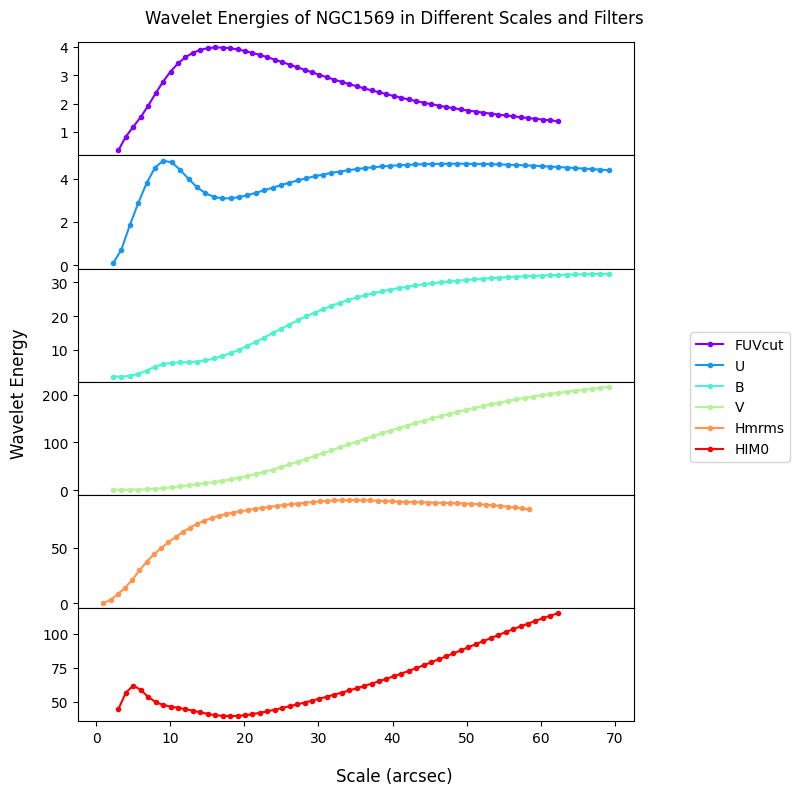

In [5]:
data_batch_energy_plot(paths,names,scales,pixel_scales,distance,scale_types,crop,'arcsec',colors=color)

In [3]:
cubes = np.array([],dtype=object)
for i in range(1,4):
    cubes = np.append(cubes,pethat_wavelet_scale_analysis(names[i],paths[i],crop[i],scales[i],scale_types[i],pixel_scale=pixel_scales[0],distance=distance))

Commencing the wavelet scale analysis of NGC1569_U
|████████████████████████████████████████| 60/60 [100%] in 3:02.7 (0.33/s) 
Wavelet scale analysis of NGC1569_U has finished.
Commencing the wavelet scale analysis of NGC1569_B
|████████████████████████████████████████| 60/60 [100%] in 3:00.0 (0.33/s) 
Wavelet scale analysis of NGC1569_B has finished.
Commencing the wavelet scale analysis of NGC1569_V
|████████████████████████████████████████| 60/60 [100%] in 2:48.7 (0.36/s) 
Wavelet scale analysis of NGC1569_V has finished.


<Figure size 640x480 with 0 Axes>

In [4]:
for pair in [[0,1],[0,2],[1,2]]:
    plot_correlation(cubes[pair[0]],cubes[pair[1]],unit='arcsec')

The normal correlation between the maps is:  0.8511408225436894
The normal correlation between the maps is:  0.7444497284768233
The normal correlation between the maps is:  0.9261098347720153


<Figure size 640x480 with 0 Axes>

Saving the layers of NGC1569_U as PNG ... DONE
Creating GIF from the coefficients of NGC1569_U ... DONE
Saving the layers of NGC1569_B as PNG ... DONE
Creating GIF from the coefficients of NGC1569_B ... DONE
Saving the layers of NGC1569_V as PNG ... DONE
Creating GIF from the coefficients of NGC1569_V ... DONE


<Figure size 640x480 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

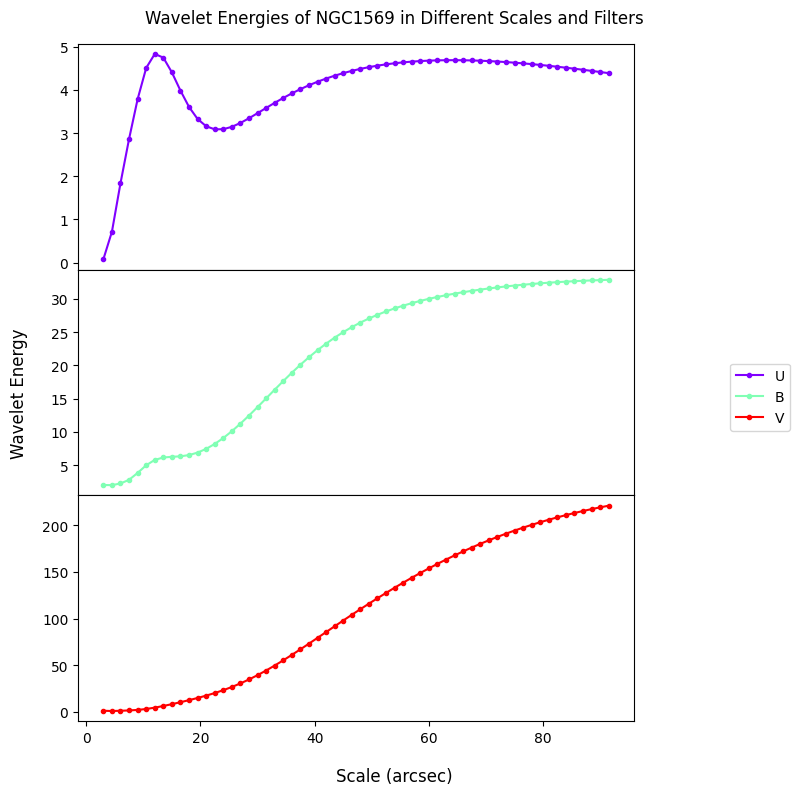

In [5]:
data_batch_energy_plot_cube(cubes,'arcsec',save_results=True)

0.001
0.001
0.001


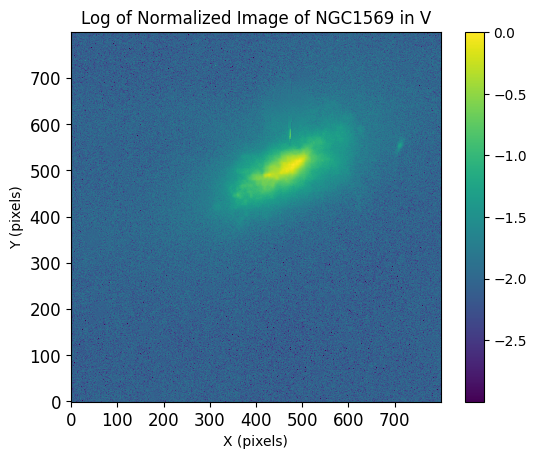

In [17]:
for i in [1,2,3]:
    adata = fits.open('.\\data\\'+paths[i])
    a = adata[0].data
    crop_cor=crop[i]
    a=a[crop_cor[0][0]:crop_cor[0][1],crop_cor[1][0]:crop_cor[1][1]]
    kont = np.array(a.astype(float))
    kont = (kont-np.min(kont))/np.max(kont-np.min(kont)) + 0.001
    print(np.min(kont))
    name = names[i]
    obj_name, [filter_name] = give_names([name])
    outname = 'Output/'+name+'/'+name+'_'
    plt.clf()
    plt.imshow(0.001+np.log10(kont), origin='lower', interpolation='nearest')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('X (pixels)')
    plt.ylabel('Y (pixels)')
    plt.title("Log of Normalized Image of "+obj_name+ " in " + filter_name, fontsize=12)
    plt.colorbar()
    plt.savefig(path+"\\"+'Output/'+name +'_original.png', dpi=200)

Commencing the wavelet scale analysis of NGC1569_U
|████████████████████████████████████████| 5/5 [100%] in 16.6s (0.30/s) 
Wavelet scale analysis of NGC1569_U has finished.


<Figure size 640x480 with 0 Axes>

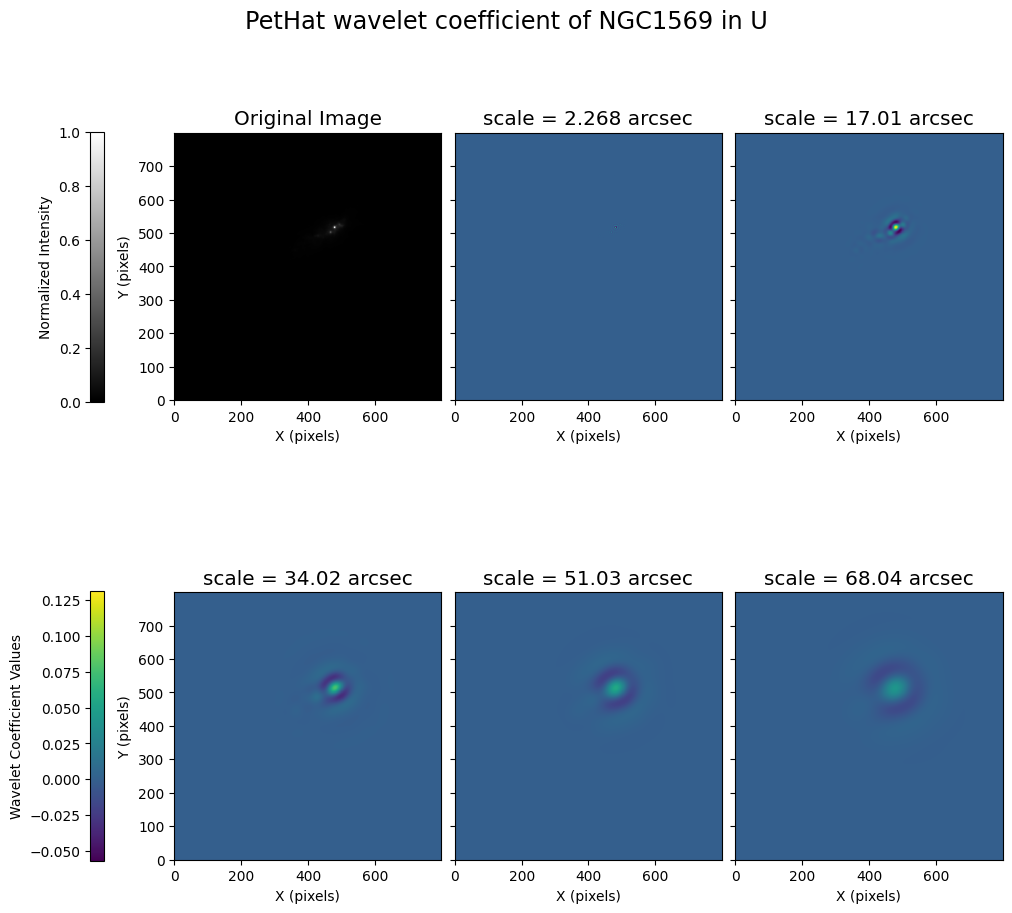

Commencing the wavelet scale analysis of NGC1569_B
|████████████████████████████████████████| 5/5 [100%] in 16.1s (0.31/s) 
Wavelet scale analysis of NGC1569_B has finished.


<Figure size 640x480 with 0 Axes>

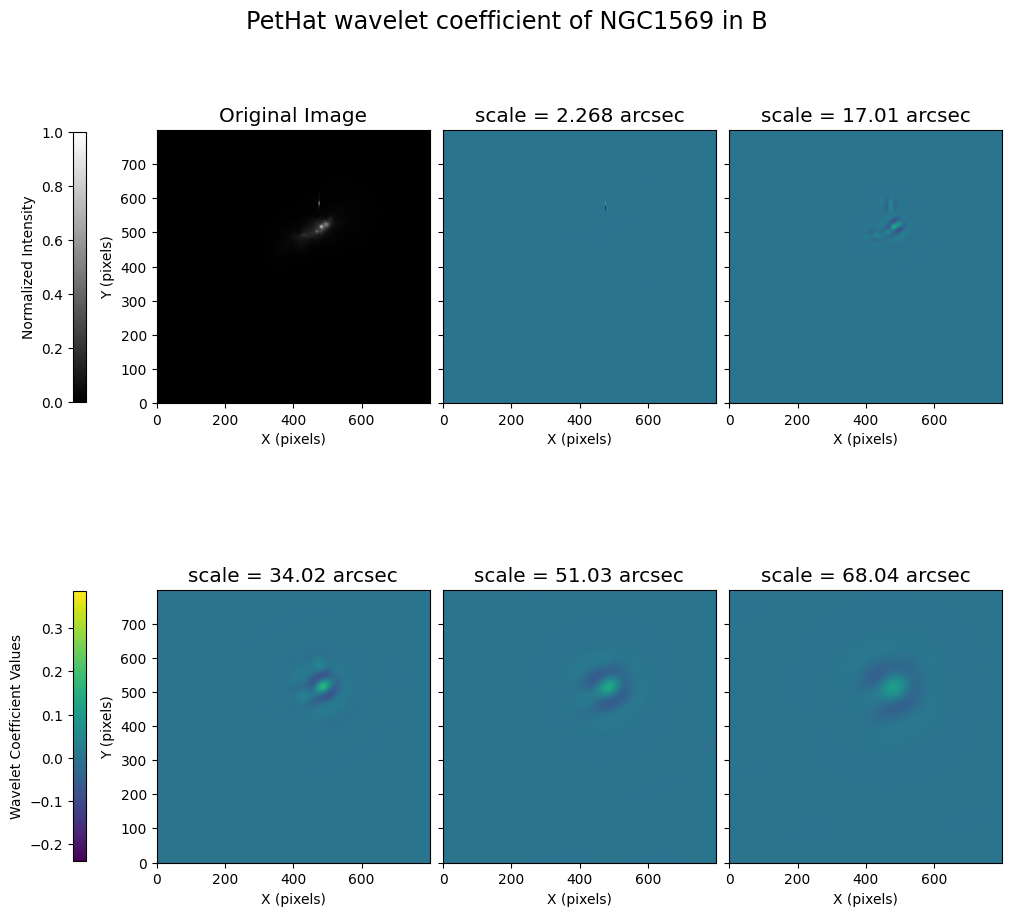

Commencing the wavelet scale analysis of NGC1569_V
|████████████████████████████████████████| 5/5 [100%] in 16.2s (0.31/s) 
Wavelet scale analysis of NGC1569_V has finished.


<Figure size 640x480 with 0 Axes>

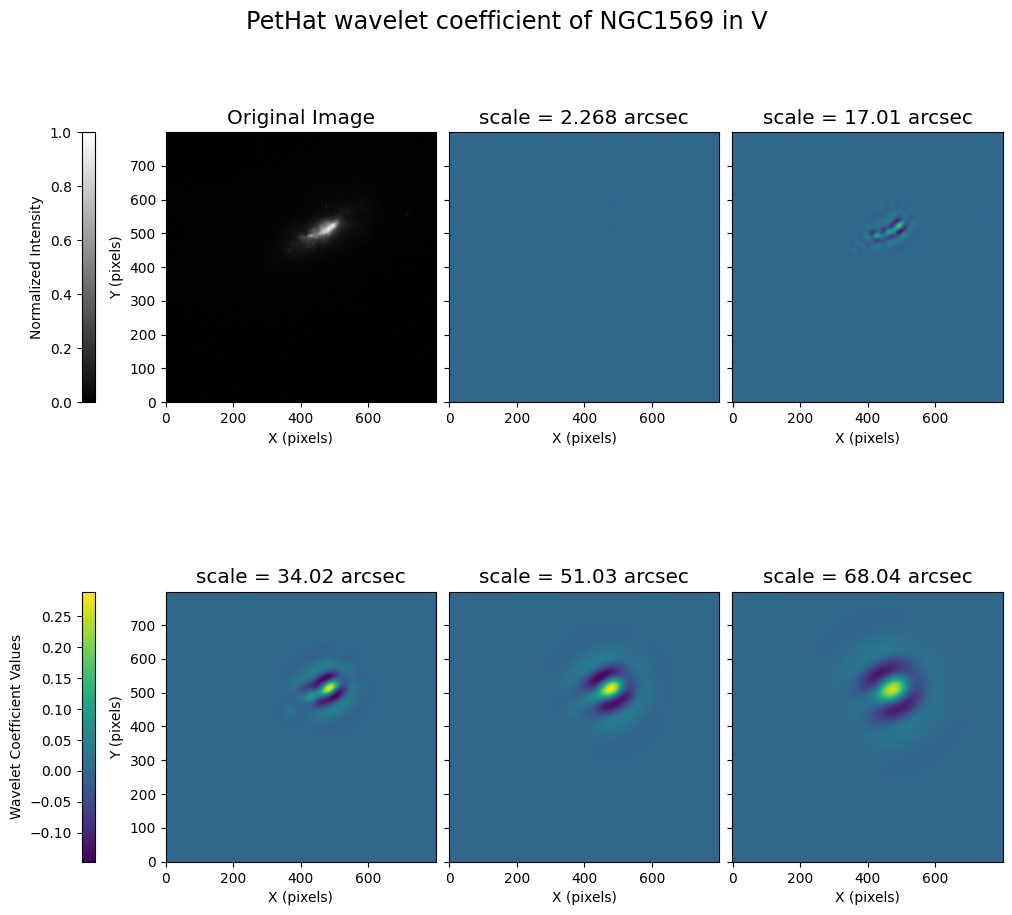

In [3]:
for i in [1,2,3]:
    plot_five_coeffs(paths[i],names[i],crop[i],'arcsec',[2,15,30,45,60], pixel_scales[i], distance=distance)